#                                    House Price Predictions


![title](https://cdn.pixabay.com/photo/2016/10/06/13/38/houses-1719055_960_720.png)

How do you search for your house!? I bet, the 1st thing cross the mind is the price. Price plays a important role in buying the house. The features such as area, number of bedrooms , amenities all play major factors which determine the price of the houses. 

In this dataset,we will be looking into various features which determine the price and factors that determines it.

The dataset is downloaded from kaggle at this link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques .


We will we be working on the data explorations, analysis and cleaning to predict the prices of the houses.

In [2]:
# Import the necessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# Set pandas display option, as we have too many columns in the dataset
pd.set_option('display.max_columns',100)

In [4]:
#Read the Train data set.
train=pd.read_csv('/Users/anoopsp/Desktop/Data Science Portfolio Projects/datasets/home-data-for-ml-course/train.csv')

In [7]:
train.shape

(1460, 81)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
#Identify the columns with missing values.
null_values=[columns for columns in train.columns if train[columns].isna().sum()>0]

In [11]:
# Display the ppercentage of values missing
for col in null_values:
    print(f'The percentage of missing value in {col}',np.round(train[col].isna().sum()/train.shape[0] *100,2),'%')

The percentage of missing value in LotFrontage 17.74 %
The percentage of missing value in Alley 93.77 %
The percentage of missing value in MasVnrType 0.55 %
The percentage of missing value in MasVnrArea 0.55 %
The percentage of missing value in BsmtQual 2.53 %
The percentage of missing value in BsmtCond 2.53 %
The percentage of missing value in BsmtExposure 2.6 %
The percentage of missing value in BsmtFinType1 2.53 %
The percentage of missing value in BsmtFinType2 2.6 %
The percentage of missing value in Electrical 0.07 %
The percentage of missing value in FireplaceQu 47.26 %
The percentage of missing value in GarageType 5.55 %
The percentage of missing value in GarageYrBlt 5.55 %
The percentage of missing value in GarageFinish 5.55 %
The percentage of missing value in GarageQual 5.55 %
The percentage of missing value in GarageCond 5.55 %
The percentage of missing value in PoolQC 99.52 %
The percentage of missing value in Fence 80.75 %
The percentage of missing value in MiscFeature 96.

We notice these columns has missing values , we need to understand how these missing values has any effect on SalePrice values.

We need to identify Numerical and Categorical columns for further analysis. We notice there are year columns too. lets identify the year columns in the dataset

In [22]:
year_col=[col for col in train.columns if 'Yr' in col or 'Year' in col]

In [28]:
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

As a data Analyst, Exploratory Data Analysis helps us to identify the trends in data. The causal effect relationship of feature to label. We can have overview of sale data price for years sold. 

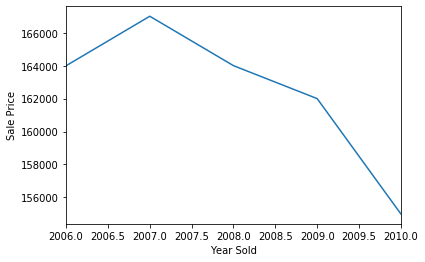

In [34]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price');

We notice that there is a downward trend of sale price after 2007. The domain and market knowledge helps us to understand the downward trend. Since there was a recession in 2008, this played a major role in the real estate prices to slump downwards.

Understanding data, business and other various factors helps Data Analysts to understand the data better while analysing and building models.

We can compare other year columns to understand the sale price, like if remodelling, Age of the house and Garage has any effect on the Sale Price.

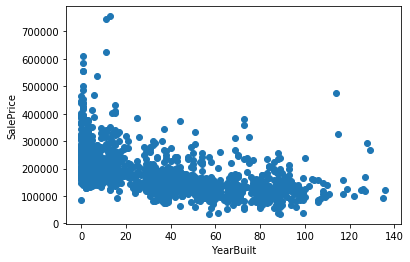

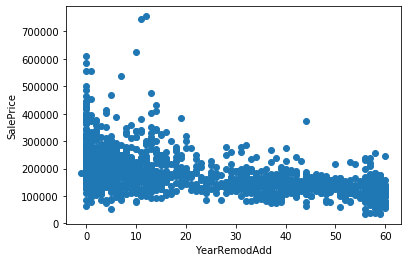

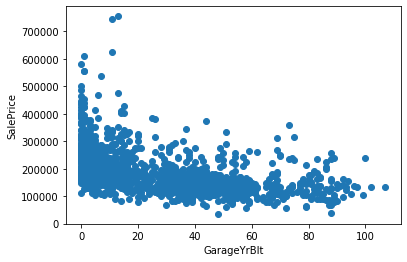

In [37]:
df=train.copy()
for col in year_col:
    if col!='YrSold':
        df[col]=train['YrSold']- train[col]
        plt.scatter(df[col],df['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()


        

Based on the plots, its safe to assume that older houses are sold for less. The remodeling and garage built also has the same effect on the Sale Price of the house.

In [12]:
#Identify the numerical columns
Numerical_columns=train.select_dtypes(exclude='object').columns

In [14]:
#Check the missing values.
train[Numerical_columns].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
Categorical_columns=train.select_dtypes(include='object').columns

In [10]:
train[Categorical_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
(len(Numerical_columns)+len(Categorical_columns))==len(train.columns)

True

We have divided our columns into numerical and categorical , we will explore these columns to do a exploratory data analysis. We noticed year sold column, will have a check how the trend of the sale price.